<a href="https://colab.research.google.com/github/neillinehan/NeilLinehanPortfolio/blob/main/Physics%20Models/Worksheet_L1_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import pandas  as pd

In [ ]:
data = pd.read_csv('/content/Linescans_Dat.xlsx - Sep19.csv',index_col=0)

#8.a

In [ ]:
#arm length
L = 17.02 * 0.0254 #in meters
dL = .25 * 0.0254 #uncert in meters
pdL = dL/L #percentage error
data['x'] = data.index[len(data)//2] - data.index # pixels from center
data['x'] = data['x']*8*10**-6 #pix(i) distance from center, in meters, 8um per pixel

$\theta = \tan^{-1}(x/L) $

In [ ]:
data['theta'] = np.arctan(data['x']/L) # in rads
data['dtheta'] = data['theta']*pdL #error in theta

In [ ]:
data.set_index(data['theta'],inplace=True)

$\Delta\theta = \frac{\lambda}{2d\theta}$ (Eq. A4b)

$d = \frac{\lambda}{2\Delta\theta\cdot\theta}$

where $\Delta\theta$ is space of theta between fringes.

In [ ]:
wavelen = 633*10**-9 #lambda

In [ ]:
from scipy.signal import find_peaks

In [ ]:
mich_peaks,_ = find_peaks(data['Michelson'],prominence=[203.5,690]) #prominence set to grab main peaks but not center peak

In [ ]:
mich_peaks = np.append(mich_peaks[:2],mich_peaks[3:]) #remove redudant peak

<Axes: xlabel='theta', ylabel='Michelson Intensity'>

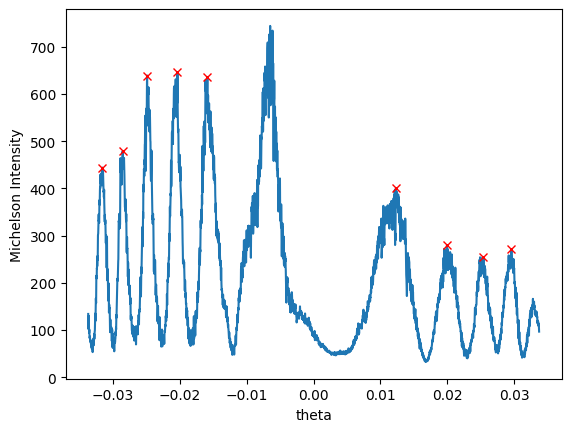

In [ ]:
data['Michelson'].plot()
data.iloc[mich_peaks]['Michelson'].plot(style='x',c='red',ylabel='Michelson Intensity')

In [ ]:
Dtheta = abs(data.iloc[mich_peaks]['theta'].diff()) #distance in theta between peaks

In [ ]:
Dtheta= Dtheta[Dtheta != Dtheta.max()] #drop distance 'over' center

In [ ]:
dDtheta =  np.sqrt(data.iloc[mich_peaks]['dtheta'].shift(1)**2 +data.iloc[mich_peaks]['dtheta']**2) #find error for Dtheta
dDtheta= dDtheta[dDtheta != dDtheta.min()] #drop error 'over' center

In [ ]:
d = abs(wavelen/2/Dtheta.values/Dtheta.index)

In [ ]:
!pip install uncertainties

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 4.3 MB/s eta 0:00:00


In [ ]:
from uncertainties import ufloat

In [ ]:
Dtheta_values = [ufloat(val, err) for val, err in zip(Dtheta.values, dDtheta.values)]

In [ ]:
ds=[]
for i,val in enumerate(Dtheta_values):
  d = abs(wavelen / 2 / val / Dtheta.index[i])  # Calculate d
  ds.append(d)

In [ ]:
sum = 0
for i in range(len(ds)-1):
  sum += ds[i+1]

In [ ]:
d = sum/7

In [ ]:
print(d)

0.00312+/-0.00015


left and right side

left

In [ ]:
lDtheta_values = [ufloat(val, err) for val, err in zip(Dtheta[Dtheta.index<0].values, dDtheta[dDtheta.index<0].values)]

In [ ]:
lds=[]
for i,val in enumerate(lDtheta_values):
  d = abs(wavelen / 2 / val / Dtheta[Dtheta.index<0].index[i])  # Calculate d
  lds.append(d)

In [ ]:
sum = 0
for i in range(len(lds)-1):
  sum += lds[i+1]

In [ ]:
left_d = sum/4

In [ ]:
print(left_d)

0.00228+/-0.00022


right

In [ ]:
rDtheta_values = [ufloat(val, err) for val, err in zip(Dtheta[Dtheta.index>0].values, dDtheta[dDtheta.index>0].values)]

In [ ]:
rds=[]
for i,val in enumerate(rDtheta_values):
  d = abs(wavelen / 2 / val / Dtheta[Dtheta.index>0].index[i])  # Calculate d
  rds.append(d)

In [ ]:
sum = 0
for i in range(len(rds)-1):
  sum += rds[i+1]

In [ ]:
right_d = sum/3

In [ ]:
print(right_d)

0.00308+/-0.00016


#8.b

In [ ]:
data['Michelson'].to_csv('I_theta_mich.csv')

In [ ]:
m_right_est = 2/wavelen*right_d

m_left_est = 2/wavelen*left_d


In [ ]:
m_right_est

9730.729685087113+/-516.6755627035346

In [ ]:
data['Michelson'][data.index>0].max() #I0 est

400.0

In [ ]:
m_left_est

7211.290496848483+/-683.3297603482862

In [ ]:
(data['dtheta']/data['theta'])

theta
 0.033741    0.014689
 0.033722    0.014689
 0.033704    0.014689
 0.033685    0.014689
 0.033667    0.014689
               ...   
-0.033648    0.014689
-0.033667    0.014689
-0.033685    0.014689
-0.033704    0.014689
-0.033722    0.014689
Length: 3648, dtype: float64

#11

In [ ]:
r = ufloat(0.167454594891079, 0.000453509550833718)

In [ ]:
F = 4* r**2 / (1-r**2)**2

In [ ]:
print(F)

0.1187+/-0.0007


In [ ]:
data = pd.read_csv('/content/Linescans_Dat.xlsx - Sep19.csv',index_col=0)

In [ ]:
#arm length
L = ufloat(0.34832, 0.00943) #in meters
data['x'] = data.index[len(data)//2] - data.index # pixels from center
data['x'] = data['x']*8*10**-6 #pix(i) distance from center, in meters, 8um per pixel

In [ ]:
pdL = L.std_dev/L.nominal_value

$\theta = \tan^{-1}(x/L) $

In [ ]:
data['theta'] = np.arctan(data['x']/L.nominal_value) # in rads
data['dtheta'] = data['theta']*pdL #error in theta

In [ ]:
data.set_index(data['theta'],inplace=True)

In [ ]:
data['FP_norm'] = data['Fabry-Perot']/data['Fabry-Perot'].max()

In [ ]:
data['FP_norm'].to_csv('I_theta_FP.csv')

##11.c

In [ ]:
from scipy.signal import peak_widths

In [ ]:
FP_peaks,_ = find_peaks(data['FP_norm'],prominence=.20) #prominence set to grab main peaks but not center peak

In [ ]:
FP_FWHM,_,_,_ = peak_widths(data['FP_norm'], FP_peaks,)

In [ ]:
Dtheta = abs(data.iloc[FP_peaks]['theta'].diff()) #distance in theta between peaks
dDtheta =  np.sqrt(data.iloc[FP_peaks]['dtheta'].shift(1)**2 +data.iloc[FP_peaks]['dtheta']**2) #find error for Dtheta
DFWHM = np.diff(FP_FWHM) #difference between FWHM

In [ ]:
Dtheta_values = [ufloat(val, err) for val, err in zip(Dtheta.dropna().values, dDtheta.dropna().values)]

$Fin=\delta_{fsr}/\delta_{FWHM}$

In [ ]:
Fins = []
for i,val in enumerate(Dtheta_values):
  Fins.append(val/ abs(DFWHM[i]))

In [ ]:
from uncertainties import umath

$\frac{\pi r}{1-r^2}=Fin\rightarrow r=\frac{\pi +/- \sqrt{\pi^2+4Fin^2}}{-2Fin}$

In [ ]:
r_ps=[]
r_ns=[]
for Fin in Fins:
  r_ps.append((np.pi + umath.sqrt(np.pi**2+4*Fin**2))/(-2*Fin))
  r_ns.append((np.pi - umath.sqrt(np.pi**2+4*Fin**2))/(-2*Fin))

In [ ]:
r_ns #r_ps are nonsensical

[0.0024340144926538344+/-0.0004647192889429848,
 0.00026112584633168764+/-3.01247573621033e-05,
 0.00011383241943120605+/-5.712701101438874e-06,
 0.00010390682129709337+/-2.4640871476188362e-06,
 0.00031883497653539887+/-9.183690525596105e-06,
 0.00010882998334770873+/-1.013327455961591e-05,
 8.927353847136888e-05+/-1.871297522137792e-05]